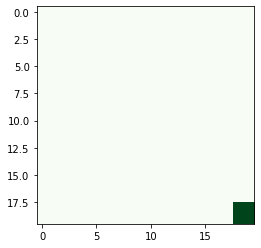

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------------
# change below parameters 
it = 100      # <--- number of iterations
nrows = 2   # <--- number of rows 
ncols = 2   # <--- number of columns (e.g. 6 processes -- 3 row by 2 column)
# --------------------------------------------

a = []
for i in range(0, it):
    for r in range(nrows):
        for c in range(ncols):
             globals()['data_%i_%d_%d' % (i,r,c)] = np.loadtxt('it_%d_row_%d_col_%d.txt'%(i,r,c),bool)
             a.append(np.loadtxt('it_%d_row_%d_col_%d.txt'%(i,r,c),bool))

c = []
b = []
d = []          
for iteration in range(it):
    for row in range(nrows):
        for col in range(ncols):
            b.append(a[iteration*nrows*ncols + row*ncols +col])
        c.append(b)
        b=[]
    d.append(c)
    c=[]

f = []
e = []
for t in range(it):
    for col in range(nrows):
         globals()['row_%d_'%col] = np.concatenate(d[t][col],axis=1)   # column wise merge
         e.append(np.concatenate(d[t][col],axis=1))                    # column wise merge
    f.append(e)
    e = []

for t in range(it):
    matrix = np.concatenate((f[t]),axis=0)                             #row wise merge
    plt.imshow(matrix, cmap='Greens')
    plt.savefig('iteration_%d.jpg'%t)
    np.savetxt('iteration_%d.txt'%t,matrix,fmt='%d')


In [14]:
import imageio

filenames = [];
for i in range(it):
    filenames.append("iteration_%d.jpg"%i)

with imageio.get_writer('animation.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

In [15]:
print("Done")

Done
